# U.S. Opiate Prescriptions/Overdoses

Accidental death by fatal drug overdose is a rising trend in the United States. What can you do to help?

This dataset contains:
- summaries of prescription records for 250 common **opioid** and ***non-opioid*** drugs written by 25,000 unique licensed medical professionals in 2014 in the United States for citizens covered under Class D Medicare
- Metadata about the doctors themselves. 
- This data here is in a format with 1 row per prescriber and 25,000 unique prescribers down to 25,000 to keep it manageable. 
- The main data is in `prescriber-info.csv`. 
- There is also `opioids.csv` that contains the names of all opioid drugs included in the data 
- There is the file `overdoses.csv` that contains information on opioid related drug overdose fatalities.

The increase in overdose fatalities is a well-known problem, and the search for possible solutions is an ongoing effort. This dataset is can be used to detect sources of significant quantities of opiate prescriptions. 

The data consists of the following characteristics for each prescriber

- NPI – unique National Provider Identifier number
- Gender - (M/F)
- State - U.S. State by abbreviation
- Credentials - set of initials indicative of medical degree
- Specialty - description of type of medicinal practice
- A long list of drugs with numeric values indicating the total number of prescriptions written for the year by that individual
- `Opioid.Prescriber` - a boolean label indicating whether or not that individual prescribed opiate drugs more than 10 times in the year.


## Import our packages and data

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # so we can see the value of multiple statements at once.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
opioids = pd.read_csv('opioids.csv')
pinfo = pd.read_csv('prescriber-info.csv')
overdoses = pd.read_csv('overdoses.csv')
opioids.head()
pinfo.head()
overdoses.head()

,Drug Name,Generic Name
0,ABSTRAL,FENTANYL CITRATE
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,ACTIQ,FENTANYL CITRATE
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN


,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,AMLODIPINE.BESYLATE,AMLODIPINE.BESYLATE.BENAZEPRIL,AMOXICILLIN,AMOX.TR.POTASSIUM.CLAVULANATE,AMPHETAMINE.SALT.COMBO,ATENOLOL,ATORVASTATIN.CALCIUM,AVODART,AZITHROMYCIN,BACLOFEN,BD.ULTRA.FINE.PEN.NEEDLE,BENAZEPRIL.HCL,BENICAR,BENICAR.HCT,BENZTROPINE.MESYLATE,BISOPROLOL.HYDROCHLOROTHIAZIDE,BRIMONIDINE.TARTRATE,BUMETANIDE,BUPROPION.HCL.SR,BUPROPION.XL,BUSPIRONE.HCL,BYSTOLIC,CARBAMAZEPINE,CARBIDOPA.LEVODOPA,CARISOPRODOL,CARTIA.XT,CARVEDILOL,CEFUROXIME,CELEBREX,CEPHALEXIN,CHLORHEXIDINE.GLUCONATE,CHLORTHALIDONE,CILOSTAZOL,CIPROFLOXACIN.HCL,CITALOPRAM.HBR,CLINDAMYCIN.HCL,CLOBETASOL.PROPIONATE,CLONAZEPAM,CLONIDINE.HCL,CLOPIDOGREL,CLOTRIMAZOLE.BETAMETHASONE,COLCRYS,COMBIVENT.RESPIMAT,CRESTOR,CYCLOBENZAPRINE.HCL,DEXILANT,DIAZEPAM,DICLOFENAC.SODIUM,DICYCLOMINE.HCL,DIGOX,DIGOXIN,DILTIAZEM.24HR.CD,DILTIAZEM.24HR.ER,DILTIAZEM.ER,DILTIAZEM.HCL,DIOVAN,DIPHENOXYLATE.ATROPINE,DIVALPROEX.SODIUM,DIVALPROEX.SODIUM.ER,DONEPEZIL.HCL,DORZOLAMIDE.TIMOLOL,DOXAZOSIN.MESYLATE,DOXEPIN.HCL,DOXYCYCLINE.HYCLATE,DULOXETINE.HCL,ENALAPRIL.MALEATE,ESCITALOPRAM.OXALATE,ESTRADIOL,EXELON,FAMOTIDINE,FELODIPINE.ER,FENOFIBRATE,FENTANYL,FINASTERIDE,FLOVENT.HFA,FLUCONAZOLE,FLUOXETINE.HCL,FLUTICASONE.PROPIONATE,FUROSEMIDE,GABAPENTIN,GEMFIBROZIL,GLIMEPIRIDE,GLIPIZIDE,GLIPIZIDE.ER,GLIPIZIDE.XL,GLYBURIDE,HALOPERIDOL,HUMALOG,HYDRALAZINE.HCL,HYDROCHLOROTHIAZIDE,HYDROCODONE.ACETAMINOPHEN,HYDROCORTISONE,HYDROMORPHONE.HCL,HYDROXYZINE.HCL,IBANDRONATE.SODIUM,IBUPROFEN,INSULIN.SYRINGE,IPRATROPIUM.BROMIDE,IRBESARTAN,ISOSORBIDE.MONONITRATE.ER,JANTOVEN,JANUMET,JANUVIA,KETOCONAZOLE,KLOR.CON.10,KLOR.CON.M10,KLOR.CON.M20,LABETALOL.HCL,LACTULOSE,LAMOTRIGINE,LANSOPRAZOLE,LANTUS,LANTUS.SOLOSTAR,LATANOPROST,LEVEMIR,LEVEMIR.FLEXPEN,LEVETIRACETAM,LEVOFLOXACIN,LEVOTHYROXINE.SODIUM,LIDOCAINE,LISINOPRIL,LISINOPRIL.HYDROCHLOROTHIAZIDE,LITHIUM.CARBONATE,LORAZEPAM,LOSARTAN.HYDROCHLOROTHIAZIDE,LOSARTAN.POTASSIUM,LOVASTATIN,LOVAZA,LUMIGAN,LYRICA,MECLIZINE.HCL,MELOXICAM,METFORMIN.HCL,METFORMIN.HCL.ER,METHADONE.HCL,METHOCARBAMOL,METHOTREXATE,METHYLPREDNISOLONE,METOCLOPRAMIDE.HCL,METOLAZONE,METOPROLOL.SUCCINATE,METOPROLOL.TARTRATE,METRONIDAZOLE,MIRTAZAPINE,MONTELUKAST.SODIUM,MORPHINE.SULFATE,MORPHINE.SULFATE.ER,MUPIROCIN,NABUMETONE,NAMENDA,NAMENDA.XR,NAPROXEN,NASONEX,NEXIUM,NIACIN.ER,NIFEDICAL.XL,NIFEDIPINE.ER,NITROFURANTOIN.MONO.MACRO,NITROSTAT,NORTRIPTYLINE.HCL,NOVOLOG,NOVOLOG.FLEXPEN,NYSTATIN,OLANZAPINE,OMEPRAZOLE,ONDANSETRON.HCL,ONDANSETRON.ODT,ONGLYZA,OXCARBAZEPINE,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,OXYCODONE.ACETAMINOPHEN,OXYCODONE.HCL,OXYCONTIN,PANTOPRAZOLE.SODIUM,PAROXETINE.HCL,PHENOBARBITAL,PHENYTOIN.SODIUM.EXTENDED,PIOGLITAZONE.HCL,POLYETHYLENE.GLYCOL.3350,POTASSIUM.CHLORIDE,PRADAXA,PRAMIPEXOLE.DIHYDROCHLORIDE,PRAVASTATIN.SODIUM,PREDNISONE,PREMARIN,PRIMIDONE,PROAIR.HFA,PROMETHAZINE.HCL,PROPRANOLOL.HCL,PROPRANOLOL.HCL.ER,QUETIAPINE.FUMARATE,QUINAPRIL.HCL,RALOXIFENE.HCL,RAMIPRIL,RANEXA,RANITIDINE.HCL,RESTASIS,RISPERIDONE,ROPINIROLE.HCL,SEROQUEL.XR,SERTRALINE.HCL,SIMVASTATIN,SOTALOL,SPIRIVA,SPIRONOLACTONE,SUCRALFATE,SULFAMETHOXAZOLE.TRIMETHOPRIM,SUMATRIPTAN.SUCCINATE,SYMBICORT,SYNTHROID,TAMSULOSIN.HCL,TEMAZEPAM,TERAZOSIN.HCL,TIMOLOL.MALEATE,TIZANIDINE.HCL,TOLTERODINE.TARTRATE.ER,TOPIRAMATE,TOPROL.XL,TORSEMIDE,TRAMADOL.HCL,TRAVATAN.Z,TRAZODONE.HCL,TRIAMCINOLONE.ACETONIDE,TRIAMTERENE.HYDROCHLOROTHIAZID,VALACYCLOVIR,VALSARTAN,VALSARTAN.HYDROCHLOROTHIAZIDE,VENLAFAXINE.HCL,VENLAFAXINE.HCL.ER,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0

,State,Population,Deaths,Abbrev
0,Alabama,"4,833,722",723,AL
1,Alaska,"735,132",124,AK
2,Arizona,"6,626,624","1,211",AZ
3,Arkansas,"2,959,373",356,AR
4,California,"38,332,521","4,521",CA


In [3]:
overdoses['Deaths'].sum()

'7231241,2113564,5218996231892,6341,2061572121,7051,1722643321,0777772161,0701,2891,7625173361,0671251255453341,2535472,3001,358432,7447775222,732247701631,2692,60160383980979627853109'

## Exploration and Initial Preprocessing

In [4]:
overdoses['Deaths'] = overdoses['Deaths'].str.replace(',', '')
overdoses['Deaths'] = overdoses['Deaths'].astype(int)
overdoses['Population'] = overdoses['Population'].str.replace(',', '')
overdoses['Population'] = overdoses['Population'].astype(int)
overdoses['Deaths/Population'] = (overdoses['Deaths']/overdoses['Population'])
overdoses.head()

,State,Population,Deaths,Abbrev,Deaths/Population
0,Alabama,4833722,723,AL,0.000150
1,Alaska,735132,124,AK,0.000169
2,Arizona,6626624,1211,AZ,0.000183
3,Arkansas,2959373,356,AR,0.000120
4,California,38332521,4521,CA,0.000118


In [5]:
overdoses_plot = overdoses.copy()
overdoses_plot.set_index('State', inplace=True)
overdoses_plot.head()

,Population,Deaths,Abbrev,Deaths/Population
State,,,,
Alabama,4833722,723,AL,0.000150
Alaska,735132,124,AK,0.000169
Arizona,6626624,1211,AZ,0.000183
Arkansas,2959373,356,AR,0.000120
California,38332521,4521,CA,0.000118


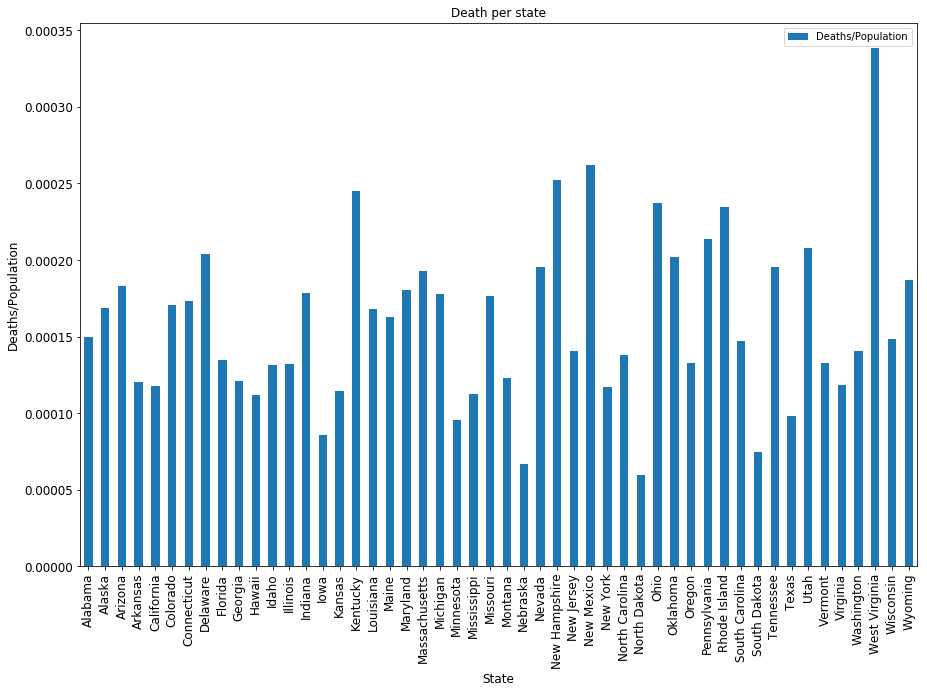

In [71]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = overdoses_plot[['Deaths/Population']].plot(kind='bar', title ="Death per state", figsize=(15, 10), fontsize=12)
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("Deaths/Population", fontsize=12)
plt.show();

In [7]:
overdoses_top_5 = overdoses_plot[['Deaths/Population']].sort_values('Deaths/Population',ascending=False).iloc[0:5]
overdoses_top_5

,Deaths/Population
State,
West Virginia,0.000338
New Mexico,0.000262
New Hampshire,0.000252
Kentucky,0.000245
Ohio,0.000237


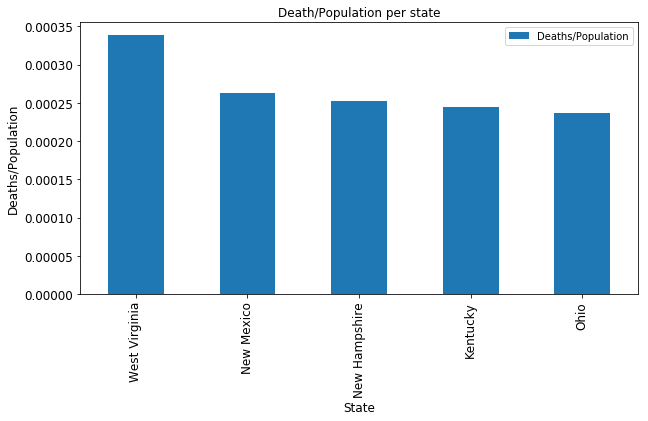

In [8]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
ax = overdoses_top_5[['Deaths/Population']].plot(kind='bar', title ="Death/Population per state", figsize=(10, 5), fontsize=12)
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("Deaths/Population", fontsize=12)
plt.show();

In [9]:
pinfo.groupby('Opioid.Prescriber').size() / pinfo.groupby('Opioid.Prescriber').size().sum()

Opioid.Prescriber
0    0.41248
1    0.58752
dtype: float64

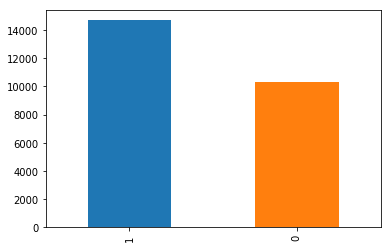

In [10]:
pd.value_counts(pinfo['Opioid.Prescriber']).plot.bar()

## Creating our Classifiers to Predict Opioid Prescribers

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

/Users/marcotavora/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
overdoses.to_csv('overdosesnew.csv')

In [13]:
overdoses = pd.read_csv('overdosesnew.csv',index_col=0)
overdoses.head()

,State,Population,Deaths,Abbrev,Deaths/Population
0,Alabama,4833722,723,AL,0.000150
1,Alaska,735132,124,AK,0.000169
2,Arizona,6626624,1211,AZ,0.000183
3,Arkansas,2959373,356,AR,0.000120
4,California,38332521,4521,CA,0.000118


In [14]:
opioids = opioids 
name = opioids['Drug Name']
import re
new_name = name.apply(lambda x:re.sub("\ |-",".",str(x)))
columns = pinfo.columns
abandoned_variables = set(columns).intersection(set(new_name))
kept_variable=[]
for each in columns:
    if each in abandoned_variables:
        pass
    else:
        kept_variable.append(each)

In [15]:
df = pinfo[kept_variable]

In [16]:
df.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,AMLODIPINE.BESYLATE,AMLODIPINE.BESYLATE.BENAZEPRIL,AMOXICILLIN,AMOX.TR.POTASSIUM.CLAVULANATE,AMPHETAMINE.SALT.COMBO,ATENOLOL,ATORVASTATIN.CALCIUM,AVODART,AZITHROMYCIN,BACLOFEN,BD.ULTRA.FINE.PEN.NEEDLE,BENAZEPRIL.HCL,BENICAR,BENICAR.HCT,BENZTROPINE.MESYLATE,BISOPROLOL.HYDROCHLOROTHIAZIDE,BRIMONIDINE.TARTRATE,BUMETANIDE,BUPROPION.HCL.SR,BUPROPION.XL,BUSPIRONE.HCL,BYSTOLIC,CARBAMAZEPINE,CARBIDOPA.LEVODOPA,CARISOPRODOL,CARTIA.XT,CARVEDILOL,CEFUROXIME,CELEBREX,CEPHALEXIN,CHLORHEXIDINE.GLUCONATE,CHLORTHALIDONE,CILOSTAZOL,CIPROFLOXACIN.HCL,CITALOPRAM.HBR,CLINDAMYCIN.HCL,CLOBETASOL.PROPIONATE,CLONAZEPAM,CLONIDINE.HCL,CLOPIDOGREL,CLOTRIMAZOLE.BETAMETHASONE,COLCRYS,COMBIVENT.RESPIMAT,CRESTOR,CYCLOBENZAPRINE.HCL,DEXILANT,DIAZEPAM,DICLOFENAC.SODIUM,DICYCLOMINE.HCL,DIGOX,DIGOXIN,DILTIAZEM.24HR.CD,DILTIAZEM.24HR.ER,DILTIAZEM.ER,DILTIAZEM.HCL,DIOVAN,DIPHENOXYLATE.ATROPINE,DIVALPROEX.SODIUM,DIVALPROEX.SODIUM.ER,DONEPEZIL.HCL,DORZOLAMIDE.TIMOLOL,DOXAZOSIN.MESYLATE,DOXEPIN.HCL,DOXYCYCLINE.HYCLATE,DULOXETINE.HCL,ENALAPRIL.MALEATE,ESCITALOPRAM.OXALATE,ESTRADIOL,EXELON,FAMOTIDINE,FELODIPINE.ER,FENOFIBRATE,FINASTERIDE,FLOVENT.HFA,FLUCONAZOLE,FLUOXETINE.HCL,FLUTICASONE.PROPIONATE,FUROSEMIDE,GABAPENTIN,GEMFIBROZIL,GLIMEPIRIDE,GLIPIZIDE,GLIPIZIDE.ER,GLIPIZIDE.XL,GLYBURIDE,HALOPERIDOL,HUMALOG,HYDRALAZINE.HCL,HYDROCHLOROTHIAZIDE,HYDROCORTISONE,HYDROXYZINE.HCL,IBANDRONATE.SODIUM,IBUPROFEN,INSULIN.SYRINGE,IPRATROPIUM.BROMIDE,IRBESARTAN,ISOSORBIDE.MONONITRATE.ER,JANTOVEN,JANUMET,JANUVIA,KETOCONAZOLE,KLOR.CON.10,KLOR.CON.M10,KLOR.CON.M20,LABETALOL.HCL,LACTULOSE,LAMOTRIGINE,LANSOPRAZOLE,LANTUS,LANTUS.SOLOSTAR,LATANOPROST,LEVEMIR,LEVEMIR.FLEXPEN,LEVETIRACETAM,LEVOFLOXACIN,LEVOTHYROXINE.SODIUM,LIDOCAINE,LISINOPRIL,LISINOPRIL.HYDROCHLOROTHIAZIDE,LITHIUM.CARBONATE,LORAZEPAM,LOSARTAN.HYDROCHLOROTHIAZIDE,LOSARTAN.POTASSIUM,LOVASTATIN,LOVAZA,LUMIGAN,LYRICA,MECLIZINE.HCL,MELOXICAM,METFORMIN.HCL,METFORMIN.HCL.ER,METHOCARBAMOL,METHOTREXATE,METHYLPREDNISOLONE,METOCLOPRAMIDE.HCL,METOLAZONE,METOPROLOL.SUCCINATE,METOPROLOL.TARTRATE,METRONIDAZOLE,MIRTAZAPINE,MONTELUKAST.SODIUM,MUPIROCIN,NABUMETONE,NAMENDA,NAMENDA.XR,NAPROXEN,NASONEX,NEXIUM,NIACIN.ER,NIFEDICAL.XL,NIFEDIPINE.ER,NITROFURANTOIN.MONO.MACRO,NITROSTAT,NORTRIPTYLINE.HCL,NOVOLOG,NOVOLOG.FLEXPEN,NYSTATIN,OLANZAPINE,OMEPRAZOLE,ONDANSETRON.HCL,ONDANSETRON.ODT,ONGLYZA,OXCARBAZEPINE,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,PANTOPRAZOLE.SODIUM,PAROXETINE.HCL,PHENOBARBITAL,PHENYTOIN.SODIUM.EXTENDED,PIOGLITAZONE.HCL,POLYETHYLENE.GLYCOL.3350,POTASSIUM.CHLORIDE,PRADAXA,PRAMIPEXOLE.DIHYDROCHLORIDE,PRAVASTATIN.SODIUM,PREDNISONE,PREMARIN,PRIMIDONE,PROAIR.HFA,PROMETHAZINE.HCL,PROPRANOLOL.HCL,PROPRANOLOL.HCL.ER,QUETIAPINE.FUMARATE,QUINAPRIL.HCL,RALOXIFENE.HCL,RAMIPRIL,RANEXA,RANITIDINE.HCL,RESTASIS,RISPERIDONE,ROPINIROLE.HCL,SEROQUEL.XR,SERTRALINE.HCL,SIMVASTATIN,SOTALOL,SPIRIVA,SPIRONOLACTONE,SUCRALFATE,SULFAMETHOXAZOLE.TRIMETHOPRIM,SUMATRIPTAN.SUCCINATE,SYMBICORT,SYNTHROID,TAMSULOSIN.HCL,TEMAZEPAM,TERAZOSIN.HCL,TIMOLOL.MALEATE,TIZANIDINE.HCL,TOLTERODINE.TARTRATE.ER,TOPIRAMATE,TOPROL.XL,TORSEMIDE,TRAVATAN.Z,TRAZODONE.HCL,TRIAMCINOLONE.ACETONIDE,TRIAMTERENE.HYDROCHLOROTHIAZID,VALACYCLOVIR,VALSARTAN,VALSARTAN.HYDROCHLOROTHIAZIDE,VENLAFAXINE.HCL,VENLAFAXINE.HCL.ER,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [17]:
df = pinfo[kept_variable]
df = df.drop(df.columns[[0,3]], axis=1) 
df.head()

,Gender,State,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,AMLODIPINE.BESYLATE,AMLODIPINE.BESYLATE.BENAZEPRIL,AMOXICILLIN,AMOX.TR.POTASSIUM.CLAVULANATE,AMPHETAMINE.SALT.COMBO,ATENOLOL,ATORVASTATIN.CALCIUM,AVODART,AZITHROMYCIN,BACLOFEN,BD.ULTRA.FINE.PEN.NEEDLE,BENAZEPRIL.HCL,BENICAR,BENICAR.HCT,BENZTROPINE.MESYLATE,BISOPROLOL.HYDROCHLOROTHIAZIDE,BRIMONIDINE.TARTRATE,BUMETANIDE,BUPROPION.HCL.SR,BUPROPION.XL,BUSPIRONE.HCL,BYSTOLIC,CARBAMAZEPINE,CARBIDOPA.LEVODOPA,CARISOPRODOL,CARTIA.XT,CARVEDILOL,CEFUROXIME,CELEBREX,CEPHALEXIN,CHLORHEXIDINE.GLUCONATE,CHLORTHALIDONE,CILOSTAZOL,CIPROFLOXACIN.HCL,CITALOPRAM.HBR,CLINDAMYCIN.HCL,CLOBETASOL.PROPIONATE,CLONAZEPAM,CLONIDINE.HCL,CLOPIDOGREL,CLOTRIMAZOLE.BETAMETHASONE,COLCRYS,COMBIVENT.RESPIMAT,CRESTOR,CYCLOBENZAPRINE.HCL,DEXILANT,DIAZEPAM,DICLOFENAC.SODIUM,DICYCLOMINE.HCL,DIGOX,DIGOXIN,DILTIAZEM.24HR.CD,DILTIAZEM.24HR.ER,DILTIAZEM.ER,DILTIAZEM.HCL,DIOVAN,DIPHENOXYLATE.ATROPINE,DIVALPROEX.SODIUM,DIVALPROEX.SODIUM.ER,DONEPEZIL.HCL,DORZOLAMIDE.TIMOLOL,DOXAZOSIN.MESYLATE,DOXEPIN.HCL,DOXYCYCLINE.HYCLATE,DULOXETINE.HCL,ENALAPRIL.MALEATE,ESCITALOPRAM.OXALATE,ESTRADIOL,EXELON,FAMOTIDINE,FELODIPINE.ER,FENOFIBRATE,FINASTERIDE,FLOVENT.HFA,FLUCONAZOLE,FLUOXETINE.HCL,FLUTICASONE.PROPIONATE,FUROSEMIDE,GABAPENTIN,GEMFIBROZIL,GLIMEPIRIDE,GLIPIZIDE,GLIPIZIDE.ER,GLIPIZIDE.XL,GLYBURIDE,HALOPERIDOL,HUMALOG,HYDRALAZINE.HCL,HYDROCHLOROTHIAZIDE,HYDROCORTISONE,HYDROXYZINE.HCL,IBANDRONATE.SODIUM,IBUPROFEN,INSULIN.SYRINGE,IPRATROPIUM.BROMIDE,IRBESARTAN,ISOSORBIDE.MONONITRATE.ER,JANTOVEN,JANUMET,JANUVIA,KETOCONAZOLE,KLOR.CON.10,KLOR.CON.M10,KLOR.CON.M20,LABETALOL.HCL,LACTULOSE,LAMOTRIGINE,LANSOPRAZOLE,LANTUS,LANTUS.SOLOSTAR,LATANOPROST,LEVEMIR,LEVEMIR.FLEXPEN,LEVETIRACETAM,LEVOFLOXACIN,LEVOTHYROXINE.SODIUM,LIDOCAINE,LISINOPRIL,LISINOPRIL.HYDROCHLOROTHIAZIDE,LITHIUM.CARBONATE,LORAZEPAM,LOSARTAN.HYDROCHLOROTHIAZIDE,LOSARTAN.POTASSIUM,LOVASTATIN,LOVAZA,LUMIGAN,LYRICA,MECLIZINE.HCL,MELOXICAM,METFORMIN.HCL,METFORMIN.HCL.ER,METHOCARBAMOL,METHOTREXATE,METHYLPREDNISOLONE,METOCLOPRAMIDE.HCL,METOLAZONE,METOPROLOL.SUCCINATE,METOPROLOL.TARTRATE,METRONIDAZOLE,MIRTAZAPINE,MONTELUKAST.SODIUM,MUPIROCIN,NABUMETONE,NAMENDA,NAMENDA.XR,NAPROXEN,NASONEX,NEXIUM,NIACIN.ER,NIFEDICAL.XL,NIFEDIPINE.ER,NITROFURANTOIN.MONO.MACRO,NITROSTAT,NORTRIPTYLINE.HCL,NOVOLOG,NOVOLOG.FLEXPEN,NYSTATIN,OLANZAPINE,OMEPRAZOLE,ONDANSETRON.HCL,ONDANSETRON.ODT,ONGLYZA,OXCARBAZEPINE,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,PANTOPRAZOLE.SODIUM,PAROXETINE.HCL,PHENOBARBITAL,PHENYTOIN.SODIUM.EXTENDED,PIOGLITAZONE.HCL,POLYETHYLENE.GLYCOL.3350,POTASSIUM.CHLORIDE,PRADAXA,PRAMIPEXOLE.DIHYDROCHLORIDE,PRAVASTATIN.SODIUM,PREDNISONE,PREMARIN,PRIMIDONE,PROAIR.HFA,PROMETHAZINE.HCL,PROPRANOLOL.HCL,PROPRANOLOL.HCL.ER,QUETIAPINE.FUMARATE,QUINAPRIL.HCL,RALOXIFENE.HCL,RAMIPRIL,RANEXA,RANITIDINE.HCL,RESTASIS,RISPERIDONE,ROPINIROLE.HCL,SEROQUEL.XR,SERTRALINE.HCL,SIMVASTATIN,SOTALOL,SPIRIVA,SPIRONOLACTONE,SUCRALFATE,SULFAMETHOXAZOLE.TRIMETHOPRIM,SUMATRIPTAN.SUCCINATE,SYMBICORT,SYNTHROID,TAMSULOSIN.HCL,TEMAZEPAM,TERAZOSIN.HCL,TIMOLOL.MALEATE,TIZANIDINE.HCL,TOLTERODINE.TARTRATE.ER,TOPIRAMATE,TOPROL.XL,TORSEMIDE,TRAVATAN.Z,TRAZODONE.HCL,TRIAMCINOLONE.ACETONIDE,TRIAMTERENE.HYDROCHLOROTHIAZID,VALACYCLOVIR,VALSARTAN,VALSARTAN.HYDROCHLOROTHIAZIDE,VENLAFAXINE.HCL,VENLAFAXINE.HCL.ER,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,M,TX,Dentist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,F,AL,Gen

In [22]:
cols = ['Specialty']
dummies = pd.concat([pd.get_dummies(df[cols][col], drop_first = True, prefix= col) for col in df[cols]], axis=1)
dummies.head()

,Specialty_Allergy/Immunology,Specialty_Anesthesiology,Specialty_Behavioral Analyst,Specialty_CRNA,Specialty_Cardiac Electrophysiology,Specialty_Cardiac Surgery,Specialty_Cardiology,Specialty_Certified Clinical Nurse Specialist,Specialty_Certified Nurse Midwife,Specialty_Chiropractic,Specialty_Clinic/Center,Specialty_Clinical Pharmacology,Specialty_Colon & Rectal Surgery,Specialty_Colorectal Surgery (formerly proctology),Specialty_Community Health Worker,Specialty_Counselor,Specialty_Critical Care (Intensivists),Specialty_Dentist,Specialty_Dermatology,Specialty_Diagnostic Radiology,Specialty_Emergency Medicine,Specialty_Endocrinology,Specialty_Family Medicine,Specialty_Family Practice,Specialty_Gastroenterology,Specialty_General Acute Care Hospital,Specialty_General Practice,Specialty_General Surgery,Specialty_Geriatric Medicine,Specialty_Geriatric Psychiatry,Specialty_Gynecological/Oncology,Specialty_Hand Surgery,Specialty_Health Maintenance Organization,Specialty_Hematology,Specialty_Hematology/Oncology,Specialty_Homeopath,Specialty_Hospice and Palliative Care,Specialty_Hospital (Dmercs Only),Specialty_Hospitalist,Specialty_Infectious Disease,Specialty_Internal Medicine,Specialty_Interventional Pain Management,Specialty_Interventional Radiology,Specialty_Legal Medicine,Specialty_Licensed Clinical Social Worker,Specialty_Licensed Practical Nurse,Specialty_Maxillofacial Surgery,Specialty_Medical Genetics,"Specialty_Medical Genetics, Ph.D. Medical Genetics",Specialty_Medical Oncology,Specialty_Midwife,Specialty_Military Health Care Provider,Specialty_Multispecialty Clinic/Group Practice,Specialty_Naturopath,Specialty_Nephrology,Specialty_Neurological Surgery,Specialty_Neurology,"Specialty_Neuromusculoskeletal Medicine, Sports Medicine",Specialty_Neuropsychiatry,Specialty_Neurosurgery,Specialty_Nuclear Medicine,Specialty_Nurse Practitioner,Specialty_Obstetrics/Gynecology,Specialty_Ophthalmology,Specialty_Optometry,Specialty_Oral & Maxillofacial Surgery,Specialty_Oral Surgery (dentists only),Specialty_Orthopaedic Surgery,Specialty_Orthopedic Surgery,Specialty_Osteopathic Manipulative Medicine,Specialty_Otolaryngology,Specialty_Pain Management,Specialty_Pathology,Specialty_Pediatric Medicine,Specialty_Personal Emergency Response Attendant,Specialty_Pharmacist,Specialty_Pharmacy Technician,Specialty_Physical Medicine and Rehabilitation,Specialty_Physical Therapist,Specialty_Physician Assistant,Specialty_Plastic Surgery,Specialty_Plastic and Reconstructive Surgery,Specialty_Podiatry,Specialty_Preferred Provider Organization,Specialty_Preventive Medicine,Specialty_Psychiatry,Specialty_Psychiatry & Neurology,Specialty_Psychologist,Specialty_Psychologist (billing independently),Specialty_Pulmonary Disease,Specialty_Radiation Oncology,Specialty_Registered Nurse,Specialty_Rehabilitation Agency,Specialty_Rheumatology,Specialty_Sleep Medicine,Specialty_Slide Preparation Facility,Specialty_Specialist,Specialty_Specialist/Technologist,Specialty_Sports Medicine,Specialty_Student in an Organized Health Care Education/Training Program,Specialty_Surgery,Specialty_Surgical Oncology,Specialty_Thoracic Surgery,Specialty_Thoracic Surgery (Cardiothoracic Vascular Surgery),Specialty_Unknown Physician Specialty Code,Specialty_Unknown Supplier/Provider,Specialty_Urology,Specialty_Vascular Surgery
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0

In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # see the value of multiple statements at once.
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer, TfidfTransformer
import numpy as np
from sklearn.metrics import confusion_matrix

In [25]:
X = dummies
X.head()

,Specialty_Allergy/Immunology,Specialty_Anesthesiology,Specialty_Behavioral Analyst,Specialty_CRNA,Specialty_Cardiac Electrophysiology,Specialty_Cardiac Surgery,Specialty_Cardiology,Specialty_Certified Clinical Nurse Specialist,Specialty_Certified Nurse Midwife,Specialty_Chiropractic,Specialty_Clinic/Center,Specialty_Clinical Pharmacology,Specialty_Colon & Rectal Surgery,Specialty_Colorectal Surgery (formerly proctology),Specialty_Community Health Worker,Specialty_Counselor,Specialty_Critical Care (Intensivists),Specialty_Dentist,Specialty_Dermatology,Specialty_Diagnostic Radiology,Specialty_Emergency Medicine,Specialty_Endocrinology,Specialty_Family Medicine,Specialty_Family Practice,Specialty_Gastroenterology,Specialty_General Acute Care Hospital,Specialty_General Practice,Specialty_General Surgery,Specialty_Geriatric Medicine,Specialty_Geriatric Psychiatry,Specialty_Gynecological/Oncology,Specialty_Hand Surgery,Specialty_Health Maintenance Organization,Specialty_Hematology,Specialty_Hematology/Oncology,Specialty_Homeopath,Specialty_Hospice and Palliative Care,Specialty_Hospital (Dmercs Only),Specialty_Hospitalist,Specialty_Infectious Disease,Specialty_Internal Medicine,Specialty_Interventional Pain Management,Specialty_Interventional Radiology,Specialty_Legal Medicine,Specialty_Licensed Clinical Social Worker,Specialty_Licensed Practical Nurse,Specialty_Maxillofacial Surgery,Specialty_Medical Genetics,"Specialty_Medical Genetics, Ph.D. Medical Genetics",Specialty_Medical Oncology,Specialty_Midwife,Specialty_Military Health Care Provider,Specialty_Multispecialty Clinic/Group Practice,Specialty_Naturopath,Specialty_Nephrology,Specialty_Neurological Surgery,Specialty_Neurology,"Specialty_Neuromusculoskeletal Medicine, Sports Medicine",Specialty_Neuropsychiatry,Specialty_Neurosurgery,Specialty_Nuclear Medicine,Specialty_Nurse Practitioner,Specialty_Obstetrics/Gynecology,Specialty_Ophthalmology,Specialty_Optometry,Specialty_Oral & Maxillofacial Surgery,Specialty_Oral Surgery (dentists only),Specialty_Orthopaedic Surgery,Specialty_Orthopedic Surgery,Specialty_Osteopathic Manipulative Medicine,Specialty_Otolaryngology,Specialty_Pain Management,Specialty_Pathology,Specialty_Pediatric Medicine,Specialty_Personal Emergency Response Attendant,Specialty_Pharmacist,Specialty_Pharmacy Technician,Specialty_Physical Medicine and Rehabilitation,Specialty_Physical Therapist,Specialty_Physician Assistant,Specialty_Plastic Surgery,Specialty_Plastic and Reconstructive Surgery,Specialty_Podiatry,Specialty_Preferred Provider Organization,Specialty_Preventive Medicine,Specialty_Psychiatry,Specialty_Psychiatry & Neurology,Specialty_Psychologist,Specialty_Psychologist (billing independently),Specialty_Pulmonary Disease,Specialty_Radiation Oncology,Specialty_Registered Nurse,Specialty_Rehabilitation Agency,Specialty_Rheumatology,Specialty_Sleep Medicine,Specialty_Slide Preparation Facility,Specialty_Specialist,Specialty_Specialist/Technologist,Specialty_Sports Medicine,Specialty_Student in an Organized Health Care Education/Training Program,Specialty_Surgery,Specialty_Surgical Oncology,Specialty_Thoracic Surgery,Specialty_Thoracic Surgery (Cardiothoracic Vascular Surgery),Specialty_Unknown Physician Specialty Code,Specialty_Unknown Supplier/Provider,Specialty_Urology,Specialty_Vascular Surgery
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0

In [26]:
X.head()

,Specialty_Allergy/Immunology,Specialty_Anesthesiology,Specialty_Behavioral Analyst,Specialty_CRNA,Specialty_Cardiac Electrophysiology,Specialty_Cardiac Surgery,Specialty_Cardiology,Specialty_Certified Clinical Nurse Specialist,Specialty_Certified Nurse Midwife,Specialty_Chiropractic,Specialty_Clinic/Center,Specialty_Clinical Pharmacology,Specialty_Colon & Rectal Surgery,Specialty_Colorectal Surgery (formerly proctology),Specialty_Community Health Worker,Specialty_Counselor,Specialty_Critical Care (Intensivists),Specialty_Dentist,Specialty_Dermatology,Specialty_Diagnostic Radiology,Specialty_Emergency Medicine,Specialty_Endocrinology,Specialty_Family Medicine,Specialty_Family Practice,Specialty_Gastroenterology,Specialty_General Acute Care Hospital,Specialty_General Practice,Specialty_General Surgery,Specialty_Geriatric Medicine,Specialty_Geriatric Psychiatry,Specialty_Gynecological/Oncology,Specialty_Hand Surgery,Specialty_Health Maintenance Organization,Specialty_Hematology,Specialty_Hematology/Oncology,Specialty_Homeopath,Specialty_Hospice and Palliative Care,Specialty_Hospital (Dmercs Only),Specialty_Hospitalist,Specialty_Infectious Disease,Specialty_Internal Medicine,Specialty_Interventional Pain Management,Specialty_Interventional Radiology,Specialty_Legal Medicine,Specialty_Licensed Clinical Social Worker,Specialty_Licensed Practical Nurse,Specialty_Maxillofacial Surgery,Specialty_Medical Genetics,"Specialty_Medical Genetics, Ph.D. Medical Genetics",Specialty_Medical Oncology,Specialty_Midwife,Specialty_Military Health Care Provider,Specialty_Multispecialty Clinic/Group Practice,Specialty_Naturopath,Specialty_Nephrology,Specialty_Neurological Surgery,Specialty_Neurology,"Specialty_Neuromusculoskeletal Medicine, Sports Medicine",Specialty_Neuropsychiatry,Specialty_Neurosurgery,Specialty_Nuclear Medicine,Specialty_Nurse Practitioner,Specialty_Obstetrics/Gynecology,Specialty_Ophthalmology,Specialty_Optometry,Specialty_Oral & Maxillofacial Surgery,Specialty_Oral Surgery (dentists only),Specialty_Orthopaedic Surgery,Specialty_Orthopedic Surgery,Specialty_Osteopathic Manipulative Medicine,Specialty_Otolaryngology,Specialty_Pain Management,Specialty_Pathology,Specialty_Pediatric Medicine,Specialty_Personal Emergency Response Attendant,Specialty_Pharmacist,Specialty_Pharmacy Technician,Specialty_Physical Medicine and Rehabilitation,Specialty_Physical Therapist,Specialty_Physician Assistant,Specialty_Plastic Surgery,Specialty_Plastic and Reconstructive Surgery,Specialty_Podiatry,Specialty_Preferred Provider Organization,Specialty_Preventive Medicine,Specialty_Psychiatry,Specialty_Psychiatry & Neurology,Specialty_Psychologist,Specialty_Psychologist (billing independently),Specialty_Pulmonary Disease,Specialty_Radiation Oncology,Specialty_Registered Nurse,Specialty_Rehabilitation Agency,Specialty_Rheumatology,Specialty_Sleep Medicine,Specialty_Slide Preparation Facility,Specialty_Specialist,Specialty_Specialist/Technologist,Specialty_Sports Medicine,Specialty_Student in an Organized Health Care Education/Training Program,Specialty_Surgery,Specialty_Surgical Oncology,Specialty_Thoracic Surgery,Specialty_Thoracic Surgery (Cardiothoracic Vascular Surgery),Specialty_Unknown Physician Specialty Code,Specialty_Unknown Supplier/Provider,Specialty_Urology,Specialty_Vascular Surgery
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0

In [27]:
y = df['Opioid.Prescriber']
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Opioid.Prescriber, dtype: int64

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed: 15.5min finished


GridSearch results
The best parameters on the training data are:
 {'max_depth': None, 'n_estimators': 100}
best max_depth: None
best n_estimators: 100
best score is: 0.76
Is the prediction smaller (S) or larger (L) than the median:

['S', 'S', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'S', 'S', 'L', 'L', 'L', 'S', 'S', 'L', 'L', 'L', 'L', 'S', 'L', 'L', 'L', 'L', 'S', 'L', 'L', 'L', 'S', 'L', 'L', 'S', 'L', 'L', 'S', 'L', 'L', 'L', 'S', 'L', 'S', 'L', 'L', 'L', 'L', 'L', 'S', 'S', 'L', 'S', 'L', 'L', 'L', 'S', 'L', 'S', 'L', 'S', 'L', 'L', 'S', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'S', 'S', 'L', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'S', 'L', 'L', 'L', 'L', 'L', 'S', 'S', 'L', 'S', 'L', 'L', 'L', 'L', 'L', 'L', 'S', 'L', 'L', 'L', 'L', 'S', 'S', 'S', 'L', 'L', 'L', 'S', 'S', 'S', 'S', 'L', 'L', 'S', 'L', 'S', 'S', 'S', 'L', 'L', 'S', 'L', 'L', 'L', 'S', 'S', 'S', 'L', 'L', 'L', 'S', 'L', 'L', 'L', 'S', 'S', 'L', 'L', 'S', 'S', 'L', 'L', 'L', 'L', 'L', '

[('S', 0.62), ('S', 0.62), ('S', 0.32), ('S', 0.08), ('S', 0.47), ('S', 0.47), ('S', 0.12), ('S', 0.47), ('S', 0.47), ('S', 0.85), ('S', 0.82), ('S', 0.62), ('S', 0.62), ('S', 0.04), ('S', 0.12), ('S', 0.02), ('S', 0.81), ('S', 0.62), ('S', 0.23), ('S', 0.22), ('S', 0.23), ('S', 0.53), ('S', 0.81), ('S', 0.12), ('S', 0.23), ('S', 0.47), ('S', 0.23), ('S', 0.82), ('S', 0.12), ('S', 0.12), ('S', 0.42), ('S', 0.04), ('S', 0.76), ('S', 0.2), ('S', 0.12), ('S', 0.08), ('S', 0.62), ('S', 0.42), ('S', 0.23), ('S', 0.77), ('S', 0.12), ('S', 0.47), ('S', 0.53), ('S', 0.12), ('S', 0.12), ('S', 0.02), ('S', 0.89), ('S', 0.04), ('S', 0.62), ('S', 0.02), ('S', 0.47), ('S', 0.11), ('S', 0.41), ('S', 0.02), ('S', 0.81), ('S', 0.62), ('S', 0.08), ('S', 0.62), ('S', 0.23), ('S', 0.32), ('S', 0.08), ('S', 0.89), ('S', 0.02), ('S', 0.62), ('S', 0.04), ('S', 0.76), ('S', 0.11), ('S', 0.32), ('S', 0.62), ('S', 0.06), ('S', 0.47), ('S', 0.47), ('S', 0.12), ('S', 0.12), ('S', 0.09), ('S', 0.02), ('S', 0.75),

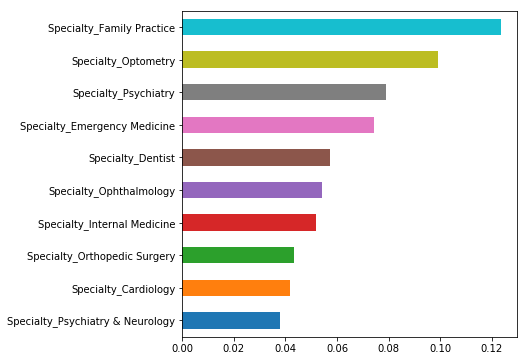

In [28]:
n_estimators = list(range(20,220,10))
max_depth = list(range(2, 22, 2)) + [None]


target = 'Opioid.Prescriber'

def rfscore2(X,y,test_size,n_estimators,max_depth):

    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, test_size = test_size, random_state=42) 
    rf_params = {
             'n_estimators':n_estimators,
             'max_depth':max_depth}   # parameters for grid search
    rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1, n_jobs=-1)
    rf_gs.fit(X_train,y_train) # training the random forest with all possible parameters
    print('GridSearch results')
    print('The best parameters on the training data are:\n',rf_gs.best_params_) # printing the best parameters
    max_depth_best = rf_gs.best_params_['max_depth']      # getting the best max_depth
    n_estimators_best = rf_gs.best_params_['n_estimators']  # getting the best n_estimators
    print("best max_depth:",max_depth_best)
    print("best n_estimators:",n_estimators_best)
    best_rf_gs = RandomForestClassifier(max_depth=max_depth_best,n_estimators=n_estimators_best) # instantiate the best model
    best_rf_gs.fit(X_train,y_train)  # fitting the best model
    best_rf_score = best_rf_gs.score(X_test,y_test) 
    print ("best score is:",round(best_rf_score,2))
    print("Is the prediction smaller (S) or larger (L) than the median:\n")
    preds = best_rf_gs.predict(X_test)
    print(['S' if p == 0 else 'L' for p in best_rf_gs.predict(X_test)])
    print("")
    print("What were the probabilities of the each result above:\n")
    print("Probabilities that the number of comments is smaller than the media for each observation are:\n")
    print([('S',round(p[0],2)) if p[0] > p[1] else ('S',round(p[0],2)) for p in best_rf_gs.predict_proba(X_test)])
    print("")
    print("Confusion Matrix:\n")
    print(pd.crosstab(pd.concat([X_test,y_test],axis=1)[target], preds, rownames=['Actual Values'], colnames=['Predicted Values']))
    print('Features and their importance:\n')
    feature_importances = pd.Series(best_rf_gs.feature_importances_, index=X.columns).sort_values().tail(10)
    print(feature_importances)
    print(feature_importances.plot(kind="barh", figsize=(6,6)))
    return


rfscore2(X,y,0.3,n_estimators,max_depth)

In [29]:
def cv_score(X,y,cv,n_estimators,max_depth):
    rf = RandomForestClassifier(n_estimators=n_estimators_best,
                                max_depth=max_depth_best)
    s = cross_val_score(rf, X, y, cv=cv, n_jobs=-1)
    return("{} Score is :{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3)))

In [30]:
dict_best = {'max_depth': None, 'n_estimators': 20}
n_estimators_best = dict_best['n_estimators']
max_depth_best = dict_best['max_depth']
cv_score(X,y,5,n_estimators_best,max_depth_best)

'Random Forest Score is :0.756 ± 0.006'

In [69]:
df = pinfo[kept_variable]
df.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,AMLODIPINE.BESYLATE,AMLODIPINE.BESYLATE.BENAZEPRIL,AMOXICILLIN,AMOX.TR.POTASSIUM.CLAVULANATE,AMPHETAMINE.SALT.COMBO,ATENOLOL,ATORVASTATIN.CALCIUM,AVODART,AZITHROMYCIN,BACLOFEN,BD.ULTRA.FINE.PEN.NEEDLE,BENAZEPRIL.HCL,BENICAR,BENICAR.HCT,BENZTROPINE.MESYLATE,BISOPROLOL.HYDROCHLOROTHIAZIDE,BRIMONIDINE.TARTRATE,BUMETANIDE,BUPROPION.HCL.SR,BUPROPION.XL,BUSPIRONE.HCL,BYSTOLIC,CARBAMAZEPINE,CARBIDOPA.LEVODOPA,CARISOPRODOL,CARTIA.XT,CARVEDILOL,CEFUROXIME,CELEBREX,CEPHALEXIN,CHLORHEXIDINE.GLUCONATE,CHLORTHALIDONE,CILOSTAZOL,CIPROFLOXACIN.HCL,CITALOPRAM.HBR,CLINDAMYCIN.HCL,CLOBETASOL.PROPIONATE,CLONAZEPAM,CLONIDINE.HCL,CLOPIDOGREL,CLOTRIMAZOLE.BETAMETHASONE,COLCRYS,COMBIVENT.RESPIMAT,CRESTOR,CYCLOBENZAPRINE.HCL,DEXILANT,DIAZEPAM,DICLOFENAC.SODIUM,DICYCLOMINE.HCL,DIGOX,DIGOXIN,DILTIAZEM.24HR.CD,DILTIAZEM.24HR.ER,DILTIAZEM.ER,DILTIAZEM.HCL,DIOVAN,DIPHENOXYLATE.ATROPINE,DIVALPROEX.SODIUM,DIVALPROEX.SODIUM.ER,DONEPEZIL.HCL,DORZOLAMIDE.TIMOLOL,DOXAZOSIN.MESYLATE,DOXEPIN.HCL,DOXYCYCLINE.HYCLATE,DULOXETINE.HCL,ENALAPRIL.MALEATE,ESCITALOPRAM.OXALATE,ESTRADIOL,EXELON,FAMOTIDINE,FELODIPINE.ER,FENOFIBRATE,FINASTERIDE,FLOVENT.HFA,FLUCONAZOLE,FLUOXETINE.HCL,FLUTICASONE.PROPIONATE,FUROSEMIDE,GABAPENTIN,GEMFIBROZIL,GLIMEPIRIDE,GLIPIZIDE,GLIPIZIDE.ER,GLIPIZIDE.XL,GLYBURIDE,HALOPERIDOL,HUMALOG,HYDRALAZINE.HCL,HYDROCHLOROTHIAZIDE,HYDROCORTISONE,HYDROXYZINE.HCL,IBANDRONATE.SODIUM,IBUPROFEN,INSULIN.SYRINGE,IPRATROPIUM.BROMIDE,IRBESARTAN,ISOSORBIDE.MONONITRATE.ER,JANTOVEN,JANUMET,JANUVIA,KETOCONAZOLE,KLOR.CON.10,KLOR.CON.M10,KLOR.CON.M20,LABETALOL.HCL,LACTULOSE,LAMOTRIGINE,LANSOPRAZOLE,LANTUS,LANTUS.SOLOSTAR,LATANOPROST,LEVEMIR,LEVEMIR.FLEXPEN,LEVETIRACETAM,LEVOFLOXACIN,LEVOTHYROXINE.SODIUM,LIDOCAINE,LISINOPRIL,LISINOPRIL.HYDROCHLOROTHIAZIDE,LITHIUM.CARBONATE,LORAZEPAM,LOSARTAN.HYDROCHLOROTHIAZIDE,LOSARTAN.POTASSIUM,LOVASTATIN,LOVAZA,LUMIGAN,LYRICA,MECLIZINE.HCL,MELOXICAM,METFORMIN.HCL,METFORMIN.HCL.ER,METHOCARBAMOL,METHOTREXATE,METHYLPREDNISOLONE,METOCLOPRAMIDE.HCL,METOLAZONE,METOPROLOL.SUCCINATE,METOPROLOL.TARTRATE,METRONIDAZOLE,MIRTAZAPINE,MONTELUKAST.SODIUM,MUPIROCIN,NABUMETONE,NAMENDA,NAMENDA.XR,NAPROXEN,NASONEX,NEXIUM,NIACIN.ER,NIFEDICAL.XL,NIFEDIPINE.ER,NITROFURANTOIN.MONO.MACRO,NITROSTAT,NORTRIPTYLINE.HCL,NOVOLOG,NOVOLOG.FLEXPEN,NYSTATIN,OLANZAPINE,OMEPRAZOLE,ONDANSETRON.HCL,ONDANSETRON.ODT,ONGLYZA,OXCARBAZEPINE,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,PANTOPRAZOLE.SODIUM,PAROXETINE.HCL,PHENOBARBITAL,PHENYTOIN.SODIUM.EXTENDED,PIOGLITAZONE.HCL,POLYETHYLENE.GLYCOL.3350,POTASSIUM.CHLORIDE,PRADAXA,PRAMIPEXOLE.DIHYDROCHLORIDE,PRAVASTATIN.SODIUM,PREDNISONE,PREMARIN,PRIMIDONE,PROAIR.HFA,PROMETHAZINE.HCL,PROPRANOLOL.HCL,PROPRANOLOL.HCL.ER,QUETIAPINE.FUMARATE,QUINAPRIL.HCL,RALOXIFENE.HCL,RAMIPRIL,RANEXA,RANITIDINE.HCL,RESTASIS,RISPERIDONE,ROPINIROLE.HCL,SEROQUEL.XR,SERTRALINE.HCL,SIMVASTATIN,SOTALOL,SPIRIVA,SPIRONOLACTONE,SUCRALFATE,SULFAMETHOXAZOLE.TRIMETHOPRIM,SUMATRIPTAN.SUCCINATE,SYMBICORT,SYNTHROID,TAMSULOSIN.HCL,TEMAZEPAM,TERAZOSIN.HCL,TIMOLOL.MALEATE,TIZANIDINE.HCL,TOLTERODINE.TARTRATE.ER,TOPIRAMATE,TOPROL.XL,TORSEMIDE,TRAVATAN.Z,TRAZODONE.HCL,TRIAMCINOLONE.ACETONIDE,TRIAMTERENE.HYDROCHLOROTHIAZID,VALACYCLOVIR,VALSARTAN,VALSARTAN.HYDROCHLOROTHIAZIDE,VENLAFAXINE.HCL,VENLAFAXINE.HCL.ER,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [32]:
c = ['NPI','Gender','State','Credentials','Opioid.Prescriber']
df3 = df.drop(c,axis=1)
df3.head()

,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,AMLODIPINE.BESYLATE,AMLODIPINE.BESYLATE.BENAZEPRIL,AMOXICILLIN,AMOX.TR.POTASSIUM.CLAVULANATE,AMPHETAMINE.SALT.COMBO,ATENOLOL,ATORVASTATIN.CALCIUM,AVODART,AZITHROMYCIN,BACLOFEN,BD.ULTRA.FINE.PEN.NEEDLE,BENAZEPRIL.HCL,BENICAR,BENICAR.HCT,BENZTROPINE.MESYLATE,BISOPROLOL.HYDROCHLOROTHIAZIDE,BRIMONIDINE.TARTRATE,BUMETANIDE,BUPROPION.HCL.SR,BUPROPION.XL,BUSPIRONE.HCL,BYSTOLIC,CARBAMAZEPINE,CARBIDOPA.LEVODOPA,CARISOPRODOL,CARTIA.XT,CARVEDILOL,CEFUROXIME,CELEBREX,CEPHALEXIN,CHLORHEXIDINE.GLUCONATE,CHLORTHALIDONE,CILOSTAZOL,CIPROFLOXACIN.HCL,CITALOPRAM.HBR,CLINDAMYCIN.HCL,CLOBETASOL.PROPIONATE,CLONAZEPAM,CLONIDINE.HCL,CLOPIDOGREL,CLOTRIMAZOLE.BETAMETHASONE,COLCRYS,COMBIVENT.RESPIMAT,CRESTOR,CYCLOBENZAPRINE.HCL,DEXILANT,DIAZEPAM,DICLOFENAC.SODIUM,DICYCLOMINE.HCL,DIGOX,DIGOXIN,DILTIAZEM.24HR.CD,DILTIAZEM.24HR.ER,DILTIAZEM.ER,DILTIAZEM.HCL,DIOVAN,DIPHENOXYLATE.ATROPINE,DIVALPROEX.SODIUM,DIVALPROEX.SODIUM.ER,DONEPEZIL.HCL,DORZOLAMIDE.TIMOLOL,DOXAZOSIN.MESYLATE,DOXEPIN.HCL,DOXYCYCLINE.HYCLATE,DULOXETINE.HCL,ENALAPRIL.MALEATE,ESCITALOPRAM.OXALATE,ESTRADIOL,EXELON,FAMOTIDINE,FELODIPINE.ER,FENOFIBRATE,FINASTERIDE,FLOVENT.HFA,FLUCONAZOLE,FLUOXETINE.HCL,FLUTICASONE.PROPIONATE,FUROSEMIDE,GABAPENTIN,GEMFIBROZIL,GLIMEPIRIDE,GLIPIZIDE,GLIPIZIDE.ER,GLIPIZIDE.XL,GLYBURIDE,HALOPERIDOL,HUMALOG,HYDRALAZINE.HCL,HYDROCHLOROTHIAZIDE,HYDROCORTISONE,HYDROXYZINE.HCL,IBANDRONATE.SODIUM,IBUPROFEN,INSULIN.SYRINGE,IPRATROPIUM.BROMIDE,IRBESARTAN,ISOSORBIDE.MONONITRATE.ER,JANTOVEN,JANUMET,JANUVIA,KETOCONAZOLE,KLOR.CON.10,KLOR.CON.M10,KLOR.CON.M20,LABETALOL.HCL,LACTULOSE,LAMOTRIGINE,LANSOPRAZOLE,LANTUS,LANTUS.SOLOSTAR,LATANOPROST,LEVEMIR,LEVEMIR.FLEXPEN,LEVETIRACETAM,LEVOFLOXACIN,LEVOTHYROXINE.SODIUM,LIDOCAINE,LISINOPRIL,LISINOPRIL.HYDROCHLOROTHIAZIDE,LITHIUM.CARBONATE,LORAZEPAM,LOSARTAN.HYDROCHLOROTHIAZIDE,LOSARTAN.POTASSIUM,LOVASTATIN,LOVAZA,LUMIGAN,LYRICA,MECLIZINE.HCL,MELOXICAM,METFORMIN.HCL,METFORMIN.HCL.ER,METHOCARBAMOL,METHOTREXATE,METHYLPREDNISOLONE,METOCLOPRAMIDE.HCL,METOLAZONE,METOPROLOL.SUCCINATE,METOPROLOL.TARTRATE,METRONIDAZOLE,MIRTAZAPINE,MONTELUKAST.SODIUM,MUPIROCIN,NABUMETONE,NAMENDA,NAMENDA.XR,NAPROXEN,NASONEX,NEXIUM,NIACIN.ER,NIFEDICAL.XL,NIFEDIPINE.ER,NITROFURANTOIN.MONO.MACRO,NITROSTAT,NORTRIPTYLINE.HCL,NOVOLOG,NOVOLOG.FLEXPEN,NYSTATIN,OLANZAPINE,OMEPRAZOLE,ONDANSETRON.HCL,ONDANSETRON.ODT,ONGLYZA,OXCARBAZEPINE,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,PANTOPRAZOLE.SODIUM,PAROXETINE.HCL,PHENOBARBITAL,PHENYTOIN.SODIUM.EXTENDED,PIOGLITAZONE.HCL,POLYETHYLENE.GLYCOL.3350,POTASSIUM.CHLORIDE,PRADAXA,PRAMIPEXOLE.DIHYDROCHLORIDE,PRAVASTATIN.SODIUM,PREDNISONE,PREMARIN,PRIMIDONE,PROAIR.HFA,PROMETHAZINE.HCL,PROPRANOLOL.HCL,PROPRANOLOL.HCL.ER,QUETIAPINE.FUMARATE,QUINAPRIL.HCL,RALOXIFENE.HCL,RAMIPRIL,RANEXA,RANITIDINE.HCL,RESTASIS,RISPERIDONE,ROPINIROLE.HCL,SEROQUEL.XR,SERTRALINE.HCL,SIMVASTATIN,SOTALOL,SPIRIVA,SPIRONOLACTONE,SUCRALFATE,SULFAMETHOXAZOLE.TRIMETHOPRIM,SUMATRIPTAN.SUCCINATE,SYMBICORT,SYNTHROID,TAMSULOSIN.HCL,TEMAZEPAM,TERAZOSIN.HCL,TIMOLOL.MALEATE,TIZANIDINE.HCL,TOLTERODINE.TARTRATE.ER,TOPIRAMATE,TOPROL.XL,TORSEMIDE,TRAVATAN.Z,TRAZODONE.HCL,TRIAMCINOLONE.ACETONIDE,TRIAMTERENE.HYDROCHLOROTHIAZID,VALACYCLOVIR,VALSARTAN,VALSARTAN.HYDROCHLOROTHIAZIDE,VENLAFAXINE.HCL,VENLAFAXINE.HCL.ER,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
0,Dentist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,General Surgery,0,0,0,0,0,0,134,0,0,15,0,0,0,0

In [33]:
df4 = df3.drop('Specialty',axis=1)
all_ops = df4[df4.columns.tolist()].sum(axis=1)
all_ops.head()

0      12
1    1056
2     289
3    1198
4     113
dtype: int64

In [34]:
df6 = df3[['Specialty']]
df5 = pd.concat([all_ops, df6], axis = 1)
df5 = df5.rename(columns={0: 'total_opioids'})
df5.head()

,total_opioids,Specialty
0,12,Dentist
1,1056,General Surgery
2,289,General Practice
3,1198,Internal Medicine
4,113,Hematology/Oncology


In [66]:
df5_new = df5[['Specialty','total_opioids']].groupby(df5['total_opioids']).sum()
df5_new.head()

,total_opioids
total_opioids,
0,0
11,7788
12,7464
13,4940
14,4732


In [70]:
cols_to_drop = ['Specialty','NPI','Gender','Credentials']
df = df.drop(cols_to_drop,axis=1)
df.head()
#dummies = pd.concat([pd.get_dummies(X_train[cols][col], drop_first = True, prefix= col) for col in X_train[cols]], axis=1)
#train_wo_dummies = X_train.drop(cols,axis=1)

,State,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,AMLODIPINE.BESYLATE,AMLODIPINE.BESYLATE.BENAZEPRIL,AMOXICILLIN,AMOX.TR.POTASSIUM.CLAVULANATE,AMPHETAMINE.SALT.COMBO,ATENOLOL,ATORVASTATIN.CALCIUM,AVODART,AZITHROMYCIN,BACLOFEN,BD.ULTRA.FINE.PEN.NEEDLE,BENAZEPRIL.HCL,BENICAR,BENICAR.HCT,BENZTROPINE.MESYLATE,BISOPROLOL.HYDROCHLOROTHIAZIDE,BRIMONIDINE.TARTRATE,BUMETANIDE,BUPROPION.HCL.SR,BUPROPION.XL,BUSPIRONE.HCL,BYSTOLIC,CARBAMAZEPINE,CARBIDOPA.LEVODOPA,CARISOPRODOL,CARTIA.XT,CARVEDILOL,CEFUROXIME,CELEBREX,CEPHALEXIN,CHLORHEXIDINE.GLUCONATE,CHLORTHALIDONE,CILOSTAZOL,CIPROFLOXACIN.HCL,CITALOPRAM.HBR,CLINDAMYCIN.HCL,CLOBETASOL.PROPIONATE,CLONAZEPAM,CLONIDINE.HCL,CLOPIDOGREL,CLOTRIMAZOLE.BETAMETHASONE,COLCRYS,COMBIVENT.RESPIMAT,CRESTOR,CYCLOBENZAPRINE.HCL,DEXILANT,DIAZEPAM,DICLOFENAC.SODIUM,DICYCLOMINE.HCL,DIGOX,DIGOXIN,DILTIAZEM.24HR.CD,DILTIAZEM.24HR.ER,DILTIAZEM.ER,DILTIAZEM.HCL,DIOVAN,DIPHENOXYLATE.ATROPINE,DIVALPROEX.SODIUM,DIVALPROEX.SODIUM.ER,DONEPEZIL.HCL,DORZOLAMIDE.TIMOLOL,DOXAZOSIN.MESYLATE,DOXEPIN.HCL,DOXYCYCLINE.HYCLATE,DULOXETINE.HCL,ENALAPRIL.MALEATE,ESCITALOPRAM.OXALATE,ESTRADIOL,EXELON,FAMOTIDINE,FELODIPINE.ER,FENOFIBRATE,FINASTERIDE,FLOVENT.HFA,FLUCONAZOLE,FLUOXETINE.HCL,FLUTICASONE.PROPIONATE,FUROSEMIDE,GABAPENTIN,GEMFIBROZIL,GLIMEPIRIDE,GLIPIZIDE,GLIPIZIDE.ER,GLIPIZIDE.XL,GLYBURIDE,HALOPERIDOL,HUMALOG,HYDRALAZINE.HCL,HYDROCHLOROTHIAZIDE,HYDROCORTISONE,HYDROXYZINE.HCL,IBANDRONATE.SODIUM,IBUPROFEN,INSULIN.SYRINGE,IPRATROPIUM.BROMIDE,IRBESARTAN,ISOSORBIDE.MONONITRATE.ER,JANTOVEN,JANUMET,JANUVIA,KETOCONAZOLE,KLOR.CON.10,KLOR.CON.M10,KLOR.CON.M20,LABETALOL.HCL,LACTULOSE,LAMOTRIGINE,LANSOPRAZOLE,LANTUS,LANTUS.SOLOSTAR,LATANOPROST,LEVEMIR,LEVEMIR.FLEXPEN,LEVETIRACETAM,LEVOFLOXACIN,LEVOTHYROXINE.SODIUM,LIDOCAINE,LISINOPRIL,LISINOPRIL.HYDROCHLOROTHIAZIDE,LITHIUM.CARBONATE,LORAZEPAM,LOSARTAN.HYDROCHLOROTHIAZIDE,LOSARTAN.POTASSIUM,LOVASTATIN,LOVAZA,LUMIGAN,LYRICA,MECLIZINE.HCL,MELOXICAM,METFORMIN.HCL,METFORMIN.HCL.ER,METHOCARBAMOL,METHOTREXATE,METHYLPREDNISOLONE,METOCLOPRAMIDE.HCL,METOLAZONE,METOPROLOL.SUCCINATE,METOPROLOL.TARTRATE,METRONIDAZOLE,MIRTAZAPINE,MONTELUKAST.SODIUM,MUPIROCIN,NABUMETONE,NAMENDA,NAMENDA.XR,NAPROXEN,NASONEX,NEXIUM,NIACIN.ER,NIFEDICAL.XL,NIFEDIPINE.ER,NITROFURANTOIN.MONO.MACRO,NITROSTAT,NORTRIPTYLINE.HCL,NOVOLOG,NOVOLOG.FLEXPEN,NYSTATIN,OLANZAPINE,OMEPRAZOLE,ONDANSETRON.HCL,ONDANSETRON.ODT,ONGLYZA,OXCARBAZEPINE,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,PANTOPRAZOLE.SODIUM,PAROXETINE.HCL,PHENOBARBITAL,PHENYTOIN.SODIUM.EXTENDED,PIOGLITAZONE.HCL,POLYETHYLENE.GLYCOL.3350,POTASSIUM.CHLORIDE,PRADAXA,PRAMIPEXOLE.DIHYDROCHLORIDE,PRAVASTATIN.SODIUM,PREDNISONE,PREMARIN,PRIMIDONE,PROAIR.HFA,PROMETHAZINE.HCL,PROPRANOLOL.HCL,PROPRANOLOL.HCL.ER,QUETIAPINE.FUMARATE,QUINAPRIL.HCL,RALOXIFENE.HCL,RAMIPRIL,RANEXA,RANITIDINE.HCL,RESTASIS,RISPERIDONE,ROPINIROLE.HCL,SEROQUEL.XR,SERTRALINE.HCL,SIMVASTATIN,SOTALOL,SPIRIVA,SPIRONOLACTONE,SUCRALFATE,SULFAMETHOXAZOLE.TRIMETHOPRIM,SUMATRIPTAN.SUCCINATE,SYMBICORT,SYNTHROID,TAMSULOSIN.HCL,TEMAZEPAM,TERAZOSIN.HCL,TIMOLOL.MALEATE,TIZANIDINE.HCL,TOLTERODINE.TARTRATE.ER,TOPIRAMATE,TOPROL.XL,TORSEMIDE,TRAVATAN.Z,TRAZODONE.HCL,TRIAMCINOLONE.ACETONIDE,TRIAMTERENE.HYDROCHLOROTHIAZID,VALACYCLOVIR,VALSARTAN,VALSARTAN.HYDROCHLOROTHIAZIDE,VENLAFAXINE.HCL,VENLAFAXINE.HCL.ER,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,TX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,AL,0,0,0,0,0,0,134,0,0,15,0,0,0,0,1

In [37]:
cols = ['Opioid.Prescriber','State']
aux = df.drop(cols,axis=1)
all_ops = aux[aux.columns.tolist()].sum(axis=1)
all_ops.head()

0      12
1    1056
2     289
3    1198
4     113
dtype: int64

In [38]:
df1 = df[['State','Opioid.Prescriber']]
df1.head()

,State,Opioid.Prescriber
0,TX,1
1,AL,1
2,NY,0
3,AZ,1
4,NV,1


In [39]:
df2 = pd.concat([all_ops, df1], axis = 1)
#X_train = X_train.rename(columns={0: 'total_opioids'})
df2.head()

,0,State,Opioid.Prescriber
0,12,TX,1
1,1056,AL,1
2,289,NY,0
3,1198,AZ,1
4,113,NV,1


In [40]:
#df2.set_index('State', inplace=True)
df2 = df2.rename(columns={0: 'total_opioids'})
df2.head()

,total_opioids,State,Opioid.Prescriber
0,12,TX,1
1,1056,AL,1
2,289,NY,0
3,1198,AZ,1
4,113,NV,1


In [41]:
df2 = df2[['State','total_opioids']]
df2.head()

,State,total_opioids
0,TX,12
1,AL,1056
2,NY,289
3,AZ,1198
4,NV,113


In [42]:
df2['State'].value_counts().head()

CA    2562
NY    1956
FL    1570
TX    1500
PA    1211
Name: State, dtype: int64

In [43]:
df2_new = df2[['total_opioids']].groupby(df2['State']).sum()
df2_new.head()

,total_opioids
State,
AA,16
AE,1314
AK,14754
AL,849871
AR,402372


In [44]:
df2_new.reset_index(level=0, inplace=True)
df2_new.head()

,State,total_opioids
0,AA,16
1,AE,1314
2,AK,14754
3,AL,849871
4,AR,402372


In [45]:
df2.columns

Index(['State', 'total_opioids'], dtype='object')

In [46]:
ops_top_5 = df2[['total_opioids','State']].sort_values('total_opioids',ascending=False).iloc[0:5]
ops_top_5

,total_opioids,State
21326,54958,TN
16707,50628,MA
14630,44138,AL
14387,43702,LA
22092,43419,GA


In [47]:
ops_top_5.set_index('State', inplace=True)
ops_top_5.head()

,total_opioids
State,
TN,54958
MA,50628
AL,44138
LA,43702
GA,43419


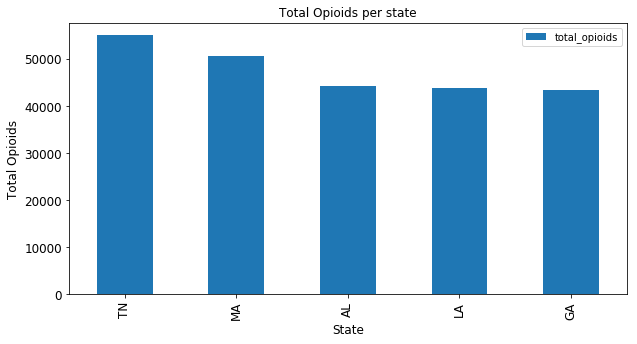

In [48]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
ax = ops_top_5.plot(kind='bar', title ="Total Opioids per state", figsize=(10, 5), fontsize=12)
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("Total Opioids", fontsize=12)
plt.show();

In [49]:
income = pd.read_csv('mhincome.csv')
income.head()

,State,Income
0,Mississippi,40593.0
1,Arkansas,41995.0
2,West Virginia,42019.0
3,Alabama,44765.0
4,Kentucky,45215.0


In [50]:
income_top_5 = income[['Income','State']].sort_values('Income',ascending=False).iloc[0:5]
income_top_5

,Income,State
5,45382.0,New Mexico
4,45215.0,Kentucky
3,44765.0,Alabama
2,42019.0,West Virginia
1,41995.0,Arkansas


In [51]:
income_top_5.set_index('State', inplace=True)
income_top_5

,Income
State,
New Mexico,45382.0
Kentucky,45215.0
Alabama,44765.0
West Virginia,42019.0
Arkansas,41995.0


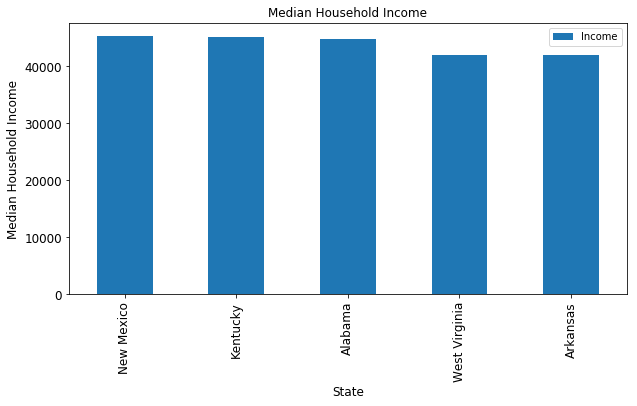

In [52]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
ax = income_top_5.plot(kind='bar', title ="Median Household Income", figsize=(10, 5), fontsize=12)
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("Median Household Income", fontsize=12)
plt.show();

In [53]:
d = {'State': ['Maine','Vermont','New Hampshire','West Virginia','Florida'], 'Median Age': [44.5,43.1,42.7,42.3,42.1]}
ages = pd.DataFrame(data=d)
ages.head()

,Median Age,State
0,44.5,Maine
1,43.1,Vermont
2,42.7,New Hampshire
3,42.3,West Virginia
4,42.1,Florida


In [54]:
ages.set_index('State', inplace=True)
ages.head()

,Median Age
State,
Maine,44.5
Vermont,43.1
New Hampshire,42.7
West Virginia,42.3
Florida,42.1


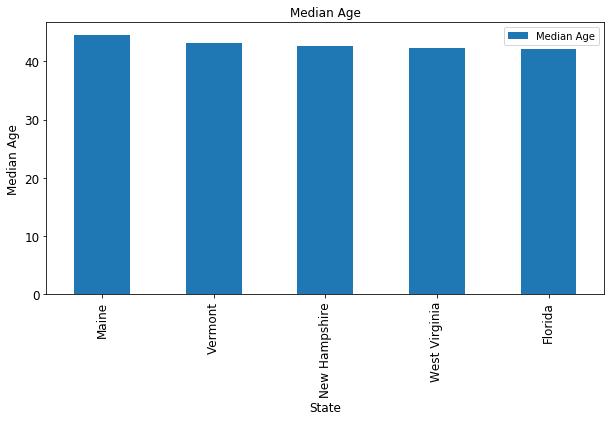

In [55]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
ax = ages.plot(kind='bar', title ="Median Age", figsize=(10, 5), fontsize=12)
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("Median Age", fontsize=12)
plt.show();